# Módulo 06 Tarefa 2

In [61]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
# Carregar o arquivo
df = pd.read_csv('SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  1) Na base do SINASC do DataSUS, faça um boxplot da idade da mãe.

In [63]:
# Verificar as variáveis existentes
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [64]:
df['IDADEMAE'].describe()

count    27028.000000
mean        26.093718
std          6.387094
min         11.000000
25%         21.000000
50%         26.000000
75%         31.000000
max         53.000000
Name: IDADEMAE, dtype: float64

Os valores de idade das mães parecem razoáveis. Há alguns valores discrepantes, como 11 e 53 anos de idade, mas que são possíveis.

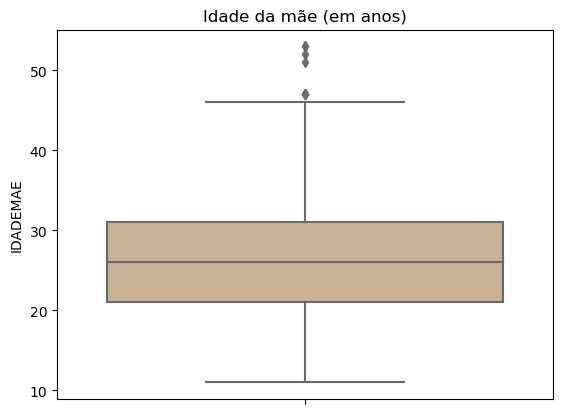

In [65]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(y = 'IDADEMAE', data = df, color = 'tan', ax = ax)
ax.set_title('Idade da mãe (em anos)')
plt.show()

####  2) Faça um boxplot do peso do bebê

In [66]:
df['PESO'].describe()

count    27028.000000
mean      3243.190654
std        544.754096
min        258.000000
25%       2965.000000
50%       3270.000000
75%       3575.000000
max       5985.000000
Name: PESO, dtype: float64

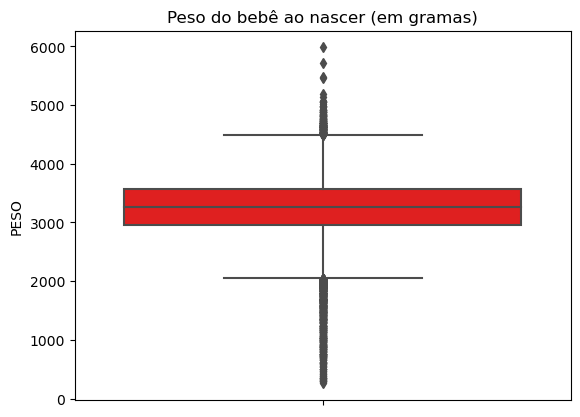

In [67]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(y = 'PESO', data = df, color = 'red')
ax.set_title('Peso do bebê ao nascer (em gramas)')
plt.show()

Há muitos _outliers_ (valores discrepantes). Vamos filtrar a base de dados, para bebês com peso entre 1,5 kg (1500 gramas) e 4,5 kg (4500 gramas).

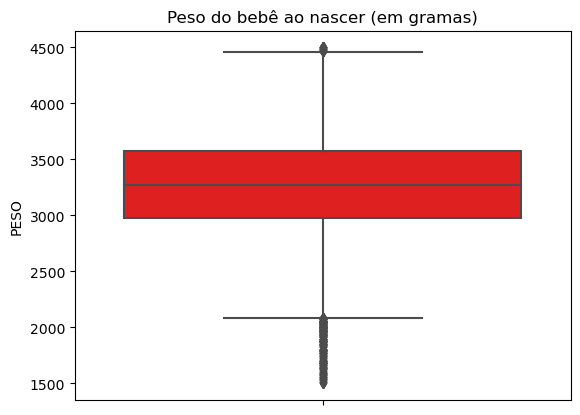

In [68]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

boxplot = sns.boxplot(y = 'PESO', data = df.loc[(df['PESO'] >= 1500) & (df['PESO'] <= 4500)] , color = 'red', ax = ax)
ax.set_title('Peso do bebê ao nascer (em gramas)')
plt.show()

####  3) Faça um histograma da idade da mãe

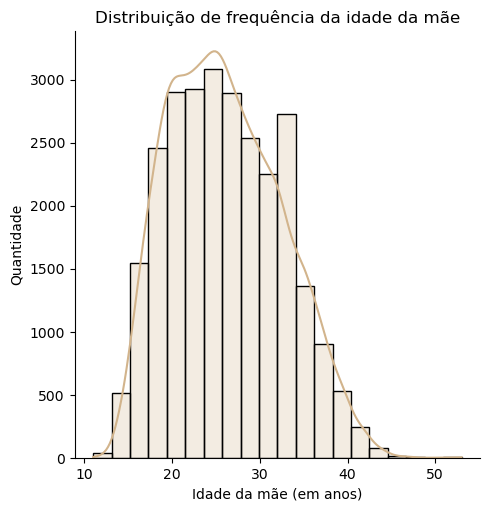

In [69]:
plt.close('all')

histograma = sns.displot(data = df, x = 'IDADEMAE', bins = 20, alpha = .25, color = 'tan', kde = True)
histograma.set_xlabels('Idade da mãe (em anos)')
histograma.set_ylabels('Quantidade')
plt.title('Distribuição de frequência da idade da mãe')

plt.show()

#### 4) Faça um histograma do peso do bebê

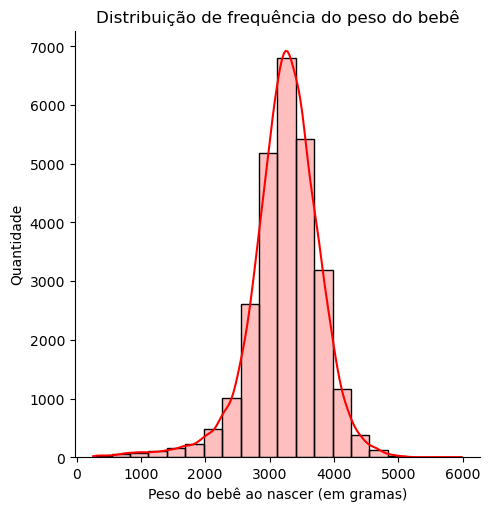

In [70]:
plt.close('all')

histograma = sns.displot(data = df, x = 'PESO', bins = 20, alpha = .25, color = 'red', kde = True)
histograma.set_xlabels('Peso do bebê ao nascer (em gramas)')
histograma.set_ylabels('Quantidade')
plt.title('Distribuição de frequência do peso do bebê')

plt.show()